In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mousedf = pd.read_csv(mouse_drug_data_to_load)
clini_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

trials_df = clini_df.merge(mousedf, how='inner', on='Mouse ID')

# Display the data table for preview
trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tu_mean = trials_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tu_mean = tu_mean.reset_index()

# Preview DataFrame
tu_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tu_sem = trials_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

tu_sem = tu_sem.reset_index()

# Preview DataFrame

tu_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#tu_mean_rf = pd.DataFrame(data=tu_mean, index=tu_mean["Timepoint"], columns = tu_mean["Drug"].unique())
tu_mean_rf = tu_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
#tu_mean_rf = tu_mean_rf(index=tu_mean["Timepoint"], columns=tu_mean["Drug"].unique())
tu_mean_rf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Creating re-formatted table with SEM for use in errorbars 
tu_sem_rf = tu_sem.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tu_sem_rf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


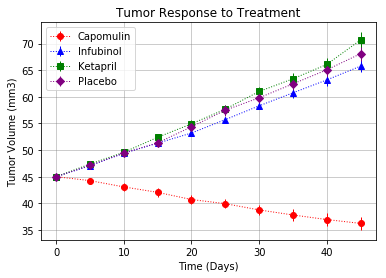

In [6]:
# Generate the Plot (with Error Bars)
x_limit = max(tu_mean["Timepoint"]) + 5
x_axis = np.arange(0, x_limit, 5)
x_axis

fig, ax = plt.subplots()

#Capomulin, = plt.plot(x_axis, tu_mean_rf["Capomulin"].tolist(), marker="o",color="r", 
#                      linestyle="dotted", linewidth=1, label="Capomulin")
Capomulin = plt.errorbar(x_axis, tu_mean_rf["Capomulin"].tolist(), tu_sem_rf["Capomulin"].tolist(), 
                         marker="o",color="r", linestyle="dotted", linewidth=1, label="Capomulin")
Infubinol = plt.errorbar(x_axis, tu_mean_rf["Infubinol"].tolist(), tu_sem_rf["Infubinol"].tolist(), 
                         marker="^",color="b", linestyle="dotted", linewidth=1, label="Infubinol")
Ketapril = plt.errorbar(x_axis, tu_mean_rf["Ketapril"].tolist(), tu_sem_rf["Ketapril"].tolist(), 
                        marker="s",color="g", linestyle="dotted", linewidth=1, label="Ketapril")
Placebo = plt.errorbar(x_axis, tu_mean_rf["Placebo"].tolist(), tu_sem_rf["Placebo"].tolist(), 
                       marker="D",color="purple", linestyle="dotted", linewidth=1, label="Placebo")

#plt.errorbar(x_axis, tu_mean_rf["Capomulin"].tolist(), tu_sem_rf["Capomulin"].tolist())

plt.legend(loc='upper left')
plt.grid(color="grey", alpha=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure

plt.savefig("Tumor Response.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = trials_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
met_mean_df = pd.DataFrame(met_mean)

# Preview DataFrame
met_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = trials_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem)

# Preview DataFrame
met_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Example appears to be using values for Tumor Volume (mm3), NOT Metastatic Sites
met_mean_df2 = met_mean.reset_index()
met_mean_rf = met_mean_df2.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked

met_mean_rf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Creating re-formatted table with SEM for use in errorbars 
met_sem_df2 = met_sem.reset_index()
met_sem_rf = met_sem_df2.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
met_sem_rf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


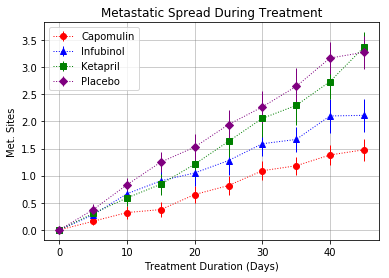

In [12]:
# Set x axis
x_axis = np.arange(0, x_limit, 5)
x_axis

fig, ax = plt.subplots()

# Plot while doing calculations to set parameters of each test drug
Capomulin = plt.errorbar(x_axis, met_mean_rf["Capomulin"].tolist(), met_sem_rf["Capomulin"].tolist(), 
                         marker="o",color="r", linestyle="dotted", linewidth=1, label="Capomulin")
Infubinol = plt.errorbar(x_axis, met_mean_rf["Infubinol"].tolist(), met_sem_rf["Infubinol"].tolist(), 
                         marker="^",color="b", linestyle="dotted", linewidth=1, label="Infubinol")
Ketapril = plt.errorbar(x_axis, met_mean_rf["Ketapril"].tolist(), met_sem_rf["Ketapril"].tolist(), 
                        marker="s",color="g", linestyle="dotted", linewidth=1, label="Ketapril")
Placebo = plt.errorbar(x_axis, met_mean_rf["Placebo"].tolist(), met_sem_rf["Placebo"].tolist(), 
                       marker="D",color="purple", linestyle="dotted", linewidth=1, label="Placebo")

# Create labels, title, and legend
plt.legend(loc='upper left')
plt.grid(color="grey", alpha=0.5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure

plt.savefig("Metastatic spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = trials_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = mice_count.reset_index()
mice_count_df2 = mice_count_df.rename(index=str, columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_count_df2.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_rf = mice_count_df2.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
mice_count_rf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


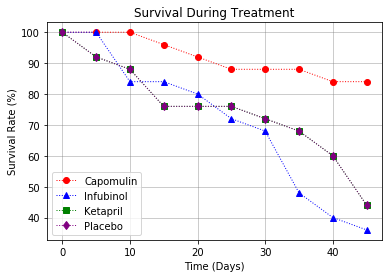

In [15]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, x_limit, 5)
x_axis


surv_capo = [x * 100 / mice_count_rf.loc[0, "Capomulin"] for x in mice_count_rf["Capomulin"].tolist()]
surv_infu = [x * 100 / mice_count_rf.loc[0, "Infubinol"] for x in mice_count_rf["Infubinol"].tolist()]
surv_keta = [x * 100 / mice_count_rf.loc[0, "Ketapril"] for x in mice_count_rf["Ketapril"].tolist()]
surv_plac = [x * 100 / mice_count_rf.loc[0, "Placebo"] for x in mice_count_rf["Placebo"].tolist()]

#for x in mice_count_rf["Capomulin"].tolist():
#    surv_capo.append(x / mice_count_rf.loc[0, "Capomulin"])
    
Capomulin = plt.plot(x_axis, surv_capo, marker="o",color="r", linestyle="dotted", linewidth=1, label="Capomulin")
Infubinol = plt.plot(x_axis, surv_infu, marker="^",color="b", linestyle="dotted", linewidth=1, label="Infubinol")
Ketapril = plt.plot(x_axis, surv_keta, marker="s",color="g", linestyle="dotted", linewidth=1, label="Ketapril")
Placebo = plt.plot(x_axis, surv_keta, marker="d",color="purple", linestyle="dotted", linewidth=1, label="Placebo")

plt.legend(loc='lower left')
plt.grid(color="grey", alpha=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("Survival rates.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

drug = []
perc_change = []

for x in mice_count_rf.columns:
    drug.append(x)
    perc_change.append((tu_mean_rf.loc[45, x] * 100 / tu_mean_rf.loc[0, x]) - 100)
# Display the data to confirm
drug_dict = dict(zip(drug, perc_change))
print("Drug")
drug_dict

Drug


{'Capomulin': -19.475302667894155,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.123471727851836,
 'Ketapril': 57.028794686606034,
 'Naftisol': 53.92334713476919,
 'Placebo': 51.29796048315151,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.32090046276666,
 'Stelasyn': 52.085134287898995,
 'Zoniferol': 46.57975086509521}

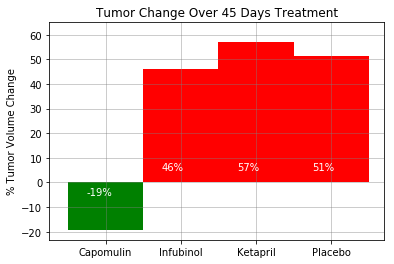

In [19]:
# Store all Relevant Percent Changes into a Tuple
relevant_perc = (drug_dict["Capomulin"], drug_dict["Infubinol"], drug_dict["Ketapril"], drug_dict["Placebo"])
relevant_drug = ("Capomulin", "Infubinol", "Ketapril", "Placebo")

# Splice the data between passing and failing drugs
rx_axis = np.arange(0, len(relevant_drug))
tick_drug = []
for x in rx_axis:
    tick_drug.append(x)

# Orient widths. Add labels, tick marks, etc. 
plt.bar(rx_axis, relevant_perc, align = "center", width=1, color = ["Green", "Red", "Red", "Red"])
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(tick_drug, relevant_drug)
plt.grid(color="grey", alpha=0.5)
plt.xlim(-0.75)
plt.ylim(ymax=65)

# Use functions to label the percentages of changes
i=0.75
for x in relevant_perc:
    if x <= 0:
        plt.text(-0.25, -5, f"{int(x)}%", color="white")
    else:
        plt.text(i, 5, f"{int(x)}%", color="white")
        i +=1
        
# Save the Figure

plt.savefig("Tumor Change.png")

# Show the Figure
fig.show()